### Breast Cancer

In [60]:
from src import LogRegCDD
import pandas as pd

In [61]:
path = "../data/preprocessed/breast_cancer.csv"

In [62]:
df = pd.read_csv(path)
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

In [63]:
Y_train = df_train["Y"].values
Y_test = df_test["Y"].values


In [64]:
X_train = df_train.drop(columns=["Y"]).values
X_test = df_test.drop(columns=["Y"]).values

### Ridge, alpha = 1

Validation scores: [0.94736842 0.94736842 0.94736842 0.94736842 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.95614035 0.94736842 0.94736842
 0.94736842 0.95614035 0.94736842 0.94736842 0.95614035 0.95614035
 0.94736842 0.93859649]
Best lambda: 0.001114383876977438
Probabilities: [0.99946287 0.98190115 0.75447643 0.9700359  0.01186641]


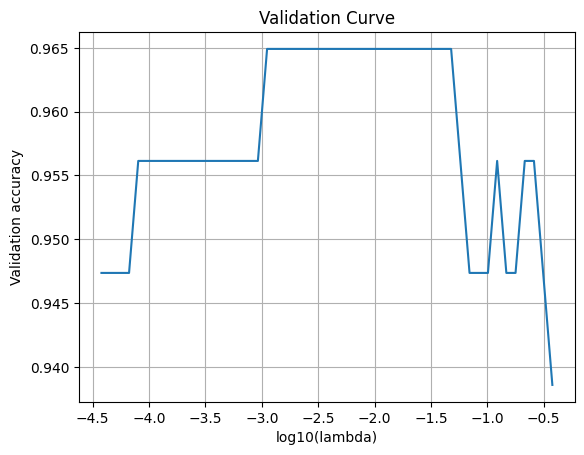

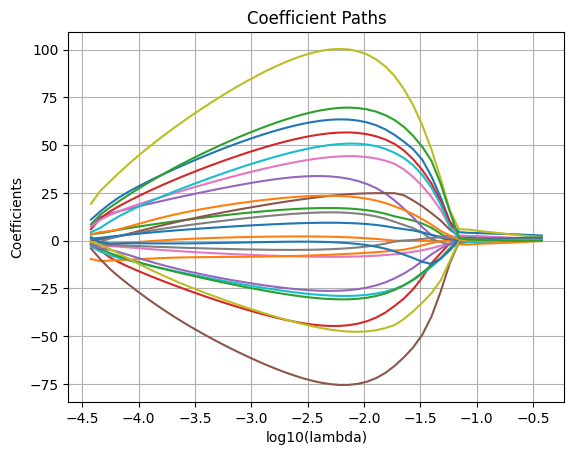

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD 


LogRegCDD_Breast_Cancer = LogRegCDD(alpha=1.0, n_lambda=50)

LogRegCDD_Breast_Cancer.fit(X_train, Y_train)

val_scores = LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_Breast_Cancer.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_Breast_Cancer.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_Breast_Cancer.plot_score(measure="accuracy")
LogRegCDD_Breast_Cancer.plot_coef()

### Elastic net, alpha = 0.5

Validation scores: [0.94736842 0.94736842 0.94736842 0.94736842 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.94736842
 0.93859649 0.94736842]
Best lambda: 0.00016040122209682814
Probabilities: [0.99861348 0.97775226 0.74409544 0.96490751 0.01938569]


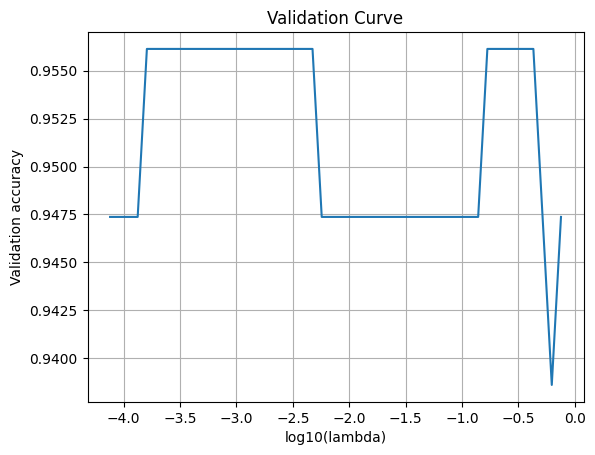

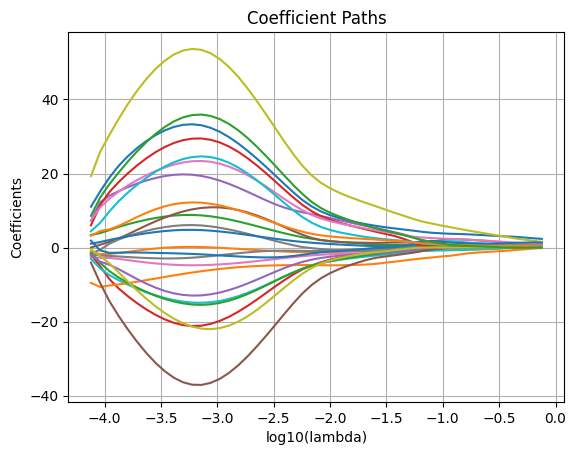

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_Breast_Cancer = LogRegCDD(alpha=0.5, n_lambda=50)

LogRegCDD_Breast_Cancer.fit(X_train, Y_train)

val_scores = LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_Breast_Cancer.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_Breast_Cancer.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_Breast_Cancer.plot_score(measure="accuracy")
LogRegCDD_Breast_Cancer.plot_coef()

### Ridge , alpha = 0

Validation scores: [0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842 0.94736842
 0.95614035 0.95614035 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.94736842 0.94736842 0.94736842 0.93859649 0.93859649
 0.93859649 0.94736842]
Best lambda: 0.4781485051249164
Probabilities: [0.99010805 0.95872663 0.71376804 0.94342224 0.05815876]


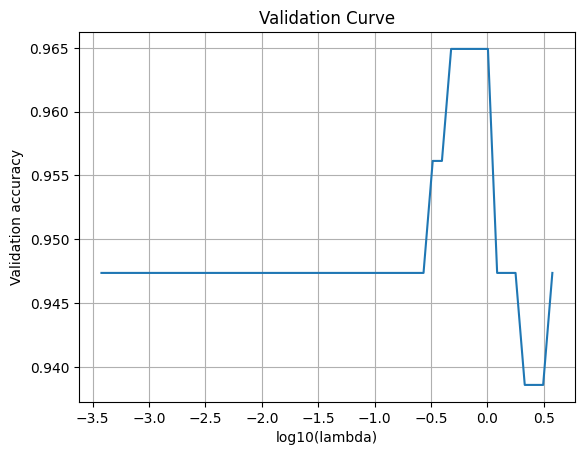

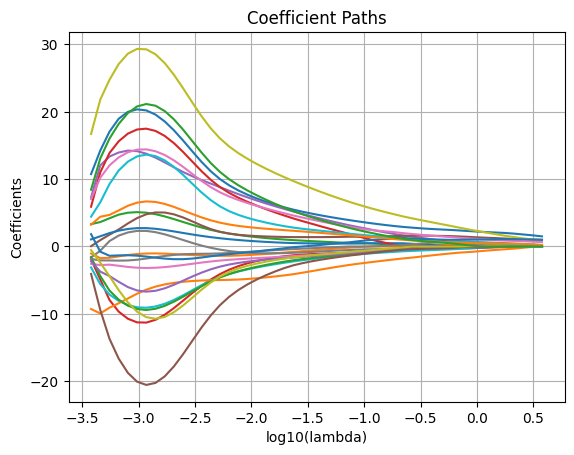

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_Breast_Cancer = LogRegCDD(alpha=0.1, n_lambda=50)

LogRegCDD_Breast_Cancer.fit(X_train, Y_train)

val_scores = LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_Breast_Cancer.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_Breast_Cancer.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_Breast_Cancer.plot_score(measure="accuracy")
LogRegCDD_Breast_Cancer.plot_coef()

### Scikit Learn alpha = 1

Best lambda: 0.8286427728546844
Probabilities: [0.99990993 0.99658017 0.69460773 0.96804161 0.00106025]
Test accuracy: 0.9649122807017544


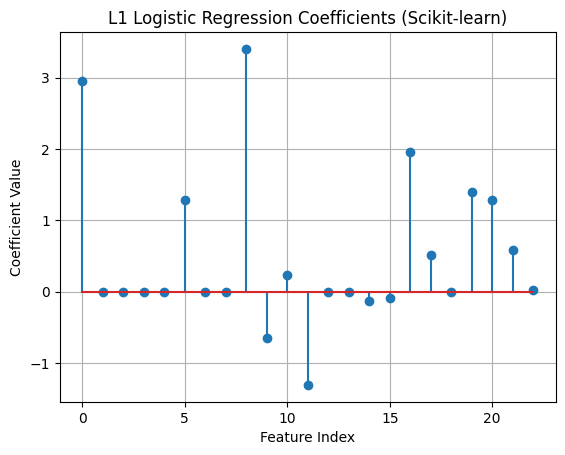

In [65]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="l1",
    solver="liblinear",
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("L1 Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### Scikit Learn alpha = 0.5

Best lambda: 0.3906939937054621
Probabilities: [9.99937925e-01 9.98662918e-01 6.80229261e-01 9.86658492e-01
 4.41743633e-04]
Test accuracy: 0.9649122807017544


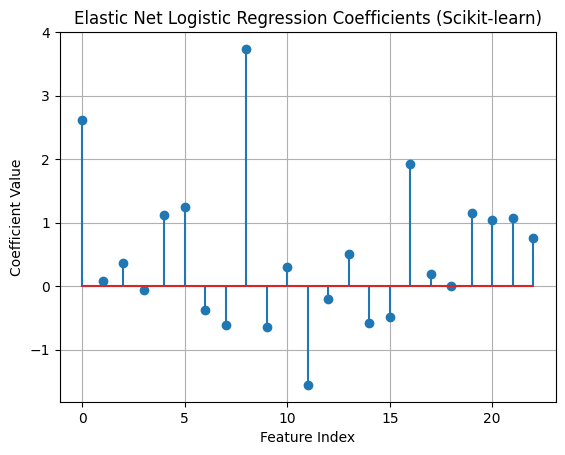

In [66]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="elasticnet",
    solver="saga",
    l1_ratios=[0.5],
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("Elastic Net Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### Scikit-learn alpha = 0

Best lambda: 0.5689866029018305
Probabilities: [9.99687661e-01 9.97831877e-01 6.92754656e-01 9.82691927e-01
 9.89660776e-04]
Test accuracy: 0.9649122807017544


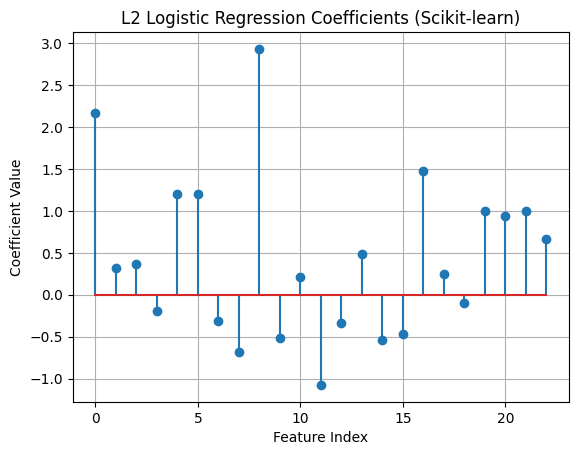

In [67]:
sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="l2",
    solver="liblinear",
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("L2 Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### Ionosphere

In [53]:
path = "../data/preprocessed/ionosphere.csv"

In [54]:
df = pd.read_csv(path)
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

In [55]:
Y_train = df_train["Y"].values
Y_test = df_test["Y"].values

In [56]:
X_train = df_train.drop(columns=["Y"]).values
X_test = df_test.drop(columns=["Y"]).values

### Ridge, alpha = 1

Validation scores: [0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.81428571 0.82857143 0.82857143 0.82857143 0.82857143
 0.85714286 0.85714286]
Best lambda: 0.10665861278206712
Probabilities: [0.96184175 0.98609697 0.99605185 0.00191883 0.97991171]


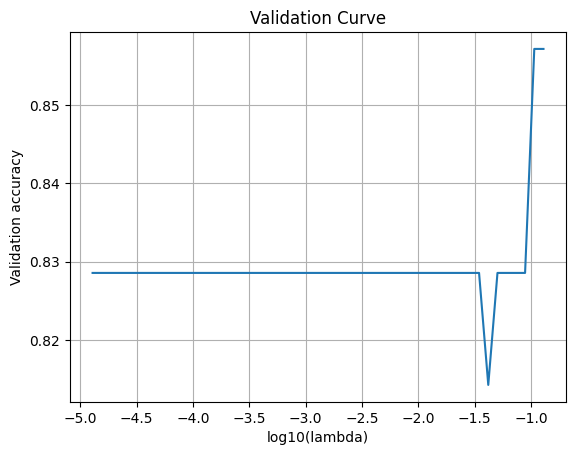

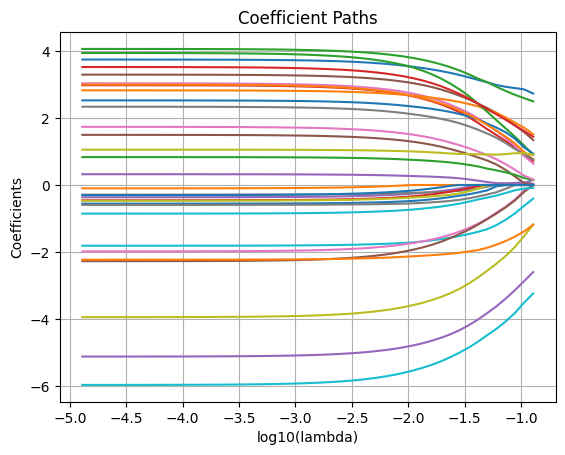

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD 


LogRegCDD_ionosphere = LogRegCDD(alpha=1.0, n_lambda=50)

LogRegCDD_ionosphere.fit(X_train, Y_train)

val_scores = LogRegCDD_ionosphere.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_ionosphere.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_ionosphere.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_ionosphere.plot_score(measure="accuracy")
LogRegCDD_ionosphere.plot_coef()

### Elastic net, alpha = 0.5

Validation scores: [0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.85714286
 0.84285714 0.84285714]
Best lambda: 0.1767637772891324
Probabilities: [0.95984021 0.98334195 0.99460854 0.00487489 0.97574009]


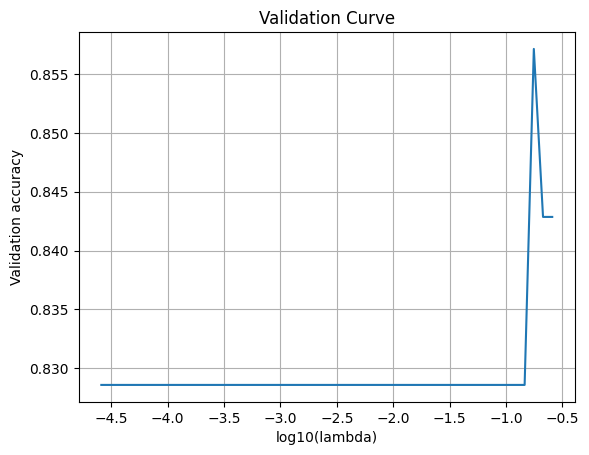

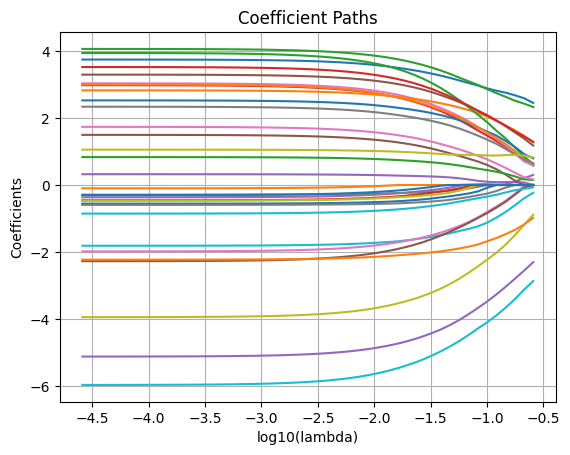

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_ionosphere = LogRegCDD(alpha=0.5, n_lambda=50)

LogRegCDD_ionosphere.fit(X_train, Y_train)

val_scores = LogRegCDD_ionosphere.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_ionosphere.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_ionosphere.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_ionosphere.plot_score(measure="accuracy")
LogRegCDD_ionosphere.plot_coef()

### Lasso, alpha = 0

Validation scores: [0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.81428571 0.81428571 0.82857143 0.82857143
 0.84285714 0.84285714 0.85714286 0.85714286 0.84285714 0.84285714
 0.82857143 0.82857143]
Best lambda: 0.39069399370546176
Probabilities: [0.86657565 0.96090403 0.99275776 0.00228031 0.96842289]


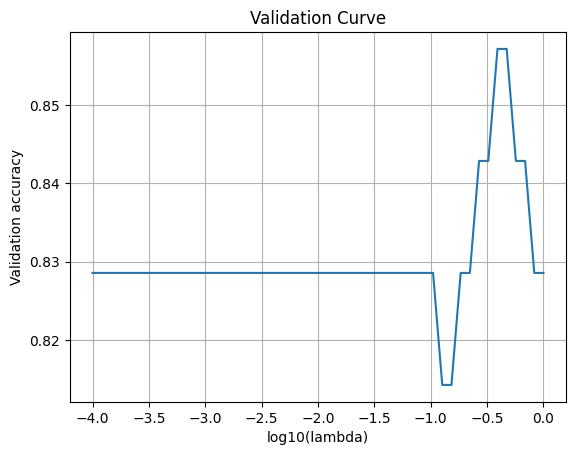

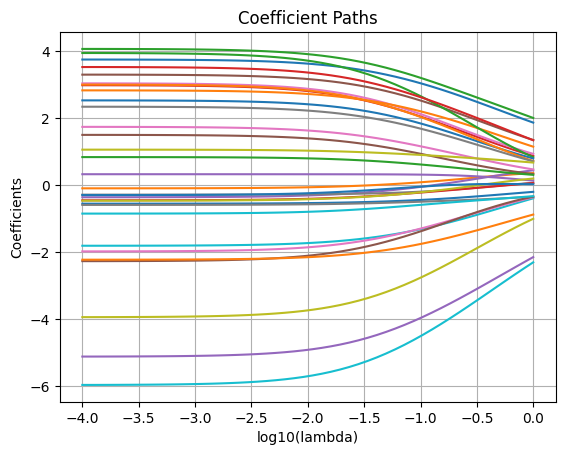

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_ionosphere = LogRegCDD(alpha=0, n_lambda=50)

LogRegCDD_ionosphere.fit(X_train, Y_train)

val_scores = LogRegCDD_ionosphere.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_ionosphere.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_ionosphere.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_ionosphere.plot_score(measure="accuracy")
LogRegCDD_ionosphere.plot_coef()

### Scikit Learn alpha = 1

Best lambda: 0.18420699693267165
Probabilities: [1.51736026e-01 6.34096323e-01 9.81563373e-01 3.36524545e-07
 8.06617654e-01]
Test accuracy: 0.8571428571428571


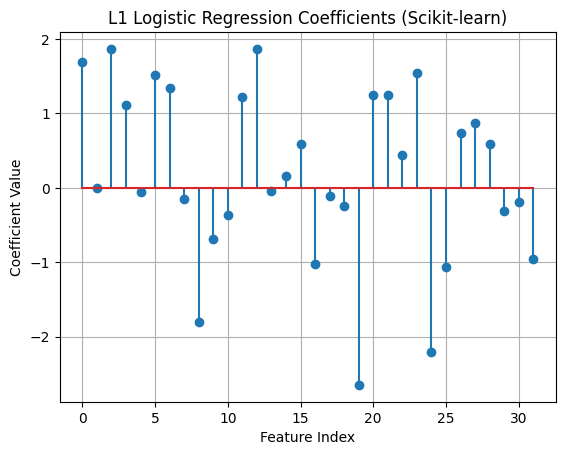

In [57]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="l1",
    solver="liblinear",
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("L1 Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### Scikit Learn alpha = 0.5

Best lambda: 0.08685113737513538
Probabilities: [1.22887515e-01 6.17221022e-01 9.83851303e-01 1.56642444e-07
 7.99465849e-01]
Test accuracy: 0.8571428571428571


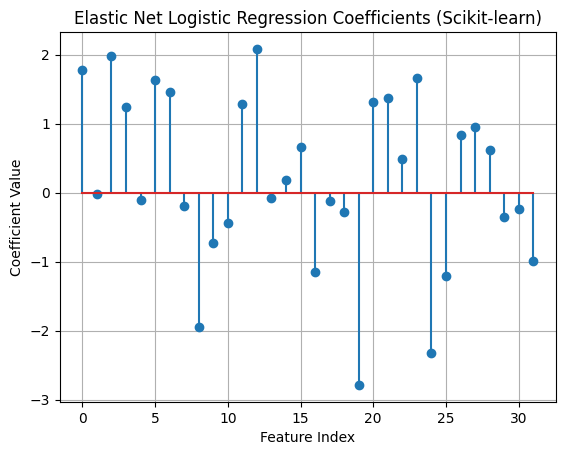

In [58]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="elasticnet",
    solver="saga",
    l1_ratios=[0.5],
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("Elastic Net Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### Scikit-learn alpha = 0

Best lambda: 7.906043210907702
Probabilities: [0.4285568  0.67964218 0.90284343 0.00306932 0.766352  ]
Test accuracy: 0.9


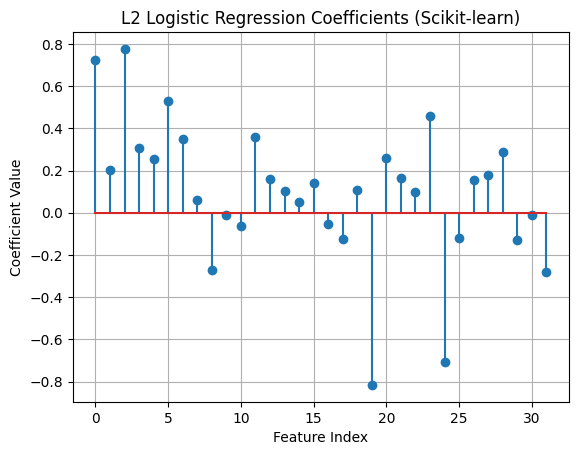

In [59]:
sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="l2",
    solver="liblinear",
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("L2 Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### wine quality

In [45]:
path = "../data/preprocessed/wine_quality.csv"

In [46]:
df = pd.read_csv(path)
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)
Y_train = df_train["Y"].values
Y_test = df_test["Y"].values
X_train = df_train.drop(columns=["Y"]).values
X_test = df_test.drop(columns=["Y"]).values


### Ridge, alpha = 1

Validation scores: [0.96458814 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797
 0.96535797 0.96535797 0.96535797 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96381832
 0.96381832 0.96458814 0.96535797 0.96612779 0.96612779 0.96612779
 0.96458814 0.96458814 0.96458814 0.96227868 0.9630485  0.96381832
 0.9630485  0.96150885 0.95765974 0.95073133 0.94149346 0.93918399
 0.93533487 0.93379523]
Best lambda: 0.015257000242899232
Probabilities: [0.01114404 0.00140602 0.00226909 0.02340096 0.05835411]


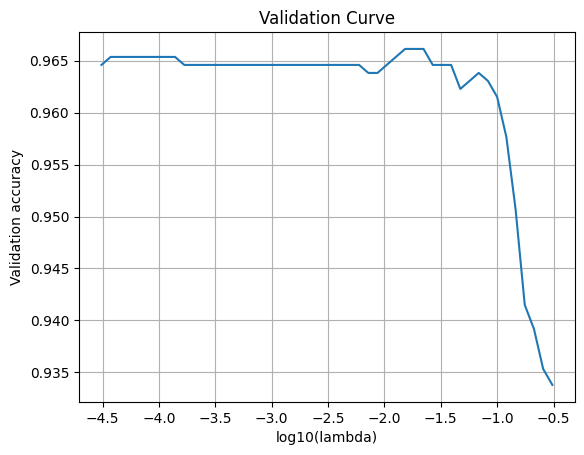

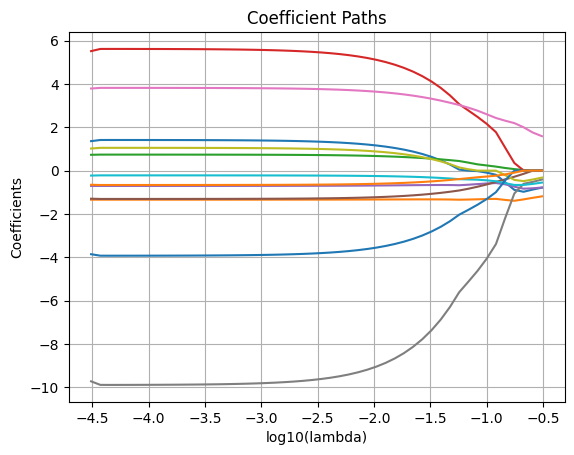

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD 


LogRegCDD_winequality = LogRegCDD(alpha=1.0, n_lambda=50)

LogRegCDD_winequality.fit(X_train, Y_train)

val_scores = LogRegCDD_winequality.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_winequality.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_winequality.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_winequality.plot_score(measure="accuracy")
LogRegCDD_winequality.plot_coef()

### Elastic net, alpha = 0.5

Validation scores: [0.96458814 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797
 0.96535797 0.96535797 0.96535797 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96381832
 0.96458814 0.96458814 0.96535797 0.96612779 0.96612779 0.96612779
 0.96458814 0.96458814 0.96535797 0.96227868 0.9630485  0.96381832
 0.9630485  0.96227868 0.95765974 0.95073133 0.94149346 0.93918399
 0.93533487 0.93456505]
Best lambda: 0.03051400048579845
Probabilities: [0.01125536 0.00142616 0.00229943 0.02357564 0.05865293]


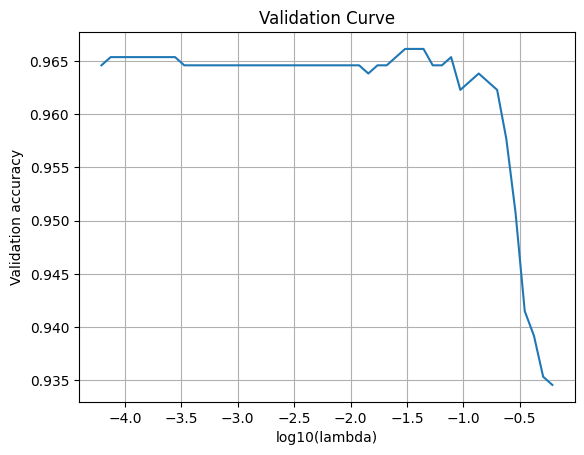

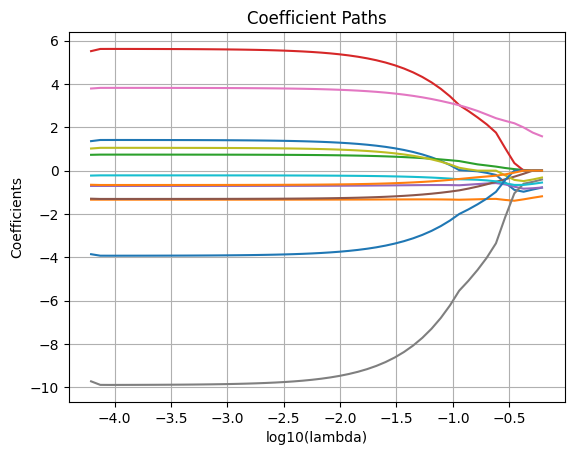

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_winequality = LogRegCDD(alpha=0.5, n_lambda=50)

LogRegCDD_winequality.fit(X_train, Y_train)

val_scores = LogRegCDD_winequality.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_winequality.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_winequality.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_winequality.plot_score(measure="accuracy")
LogRegCDD_winequality.plot_coef()

### Lasso, alpha = 0

Validation scores: [0.96458814 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797
 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797
 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797 0.96535797
 0.96535797 0.96535797 0.96535797 0.96535797 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814 0.96458814
 0.96458814 0.96458814 0.96458814 0.96381832 0.96381832 0.96458814
 0.96535797 0.96535797 0.96612779 0.96612779 0.96535797 0.96535797
 0.96612779 0.96535797]
Best lambda: 0.39069399370546176
Probabilities: [7.99513824e-05 3.08058565e-07 5.02561738e-07 2.98536590e-04
 9.10271493e-05]


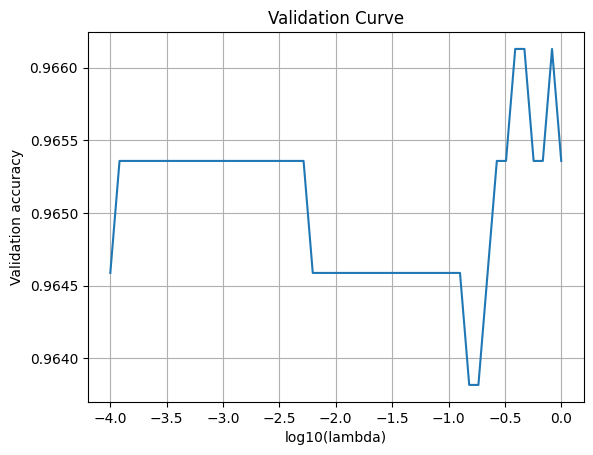

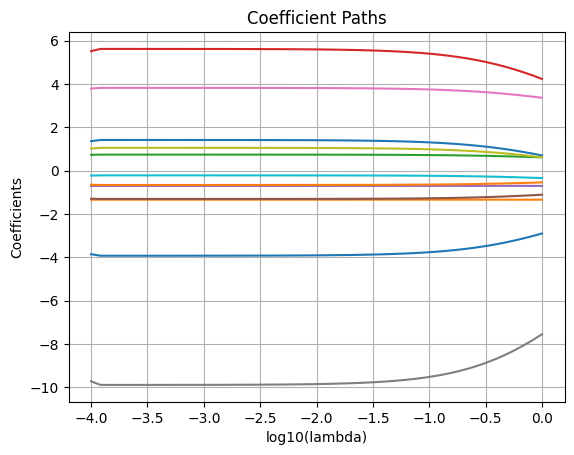

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD


LogRegCDD_winequality = LogRegCDD(alpha=0, n_lambda=50)

LogRegCDD_winequality.fit(X_train, Y_train)

val_scores = LogRegCDD_winequality.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_winequality.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_winequality.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_winequality.plot_score(measure="accuracy")
LogRegCDD_winequality.plot_coef()

### Scikit Learn alpha = 1

Best lambda: 0.05963623316594648
Probabilities: [8.66393030e-03 4.53097301e-05 6.26316067e-05 3.58425785e-02
 3.12523599e-03]
Test accuracy: 0.9969207082371054


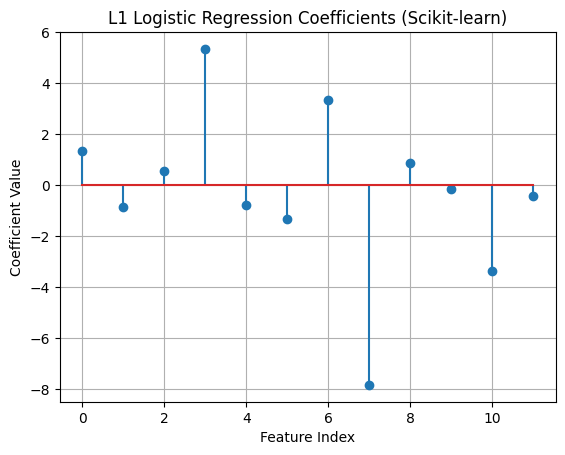

In [50]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="l1",
    solver="liblinear",
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("L1 Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### Scikit Learn alpha = 0.5

Best lambda: 0.08685113737513538
Probabilities: [9.31118927e-03 5.34768617e-05 7.48538392e-05 3.81026004e-02
 3.97392073e-03]
Test accuracy: 0.9969207082371054


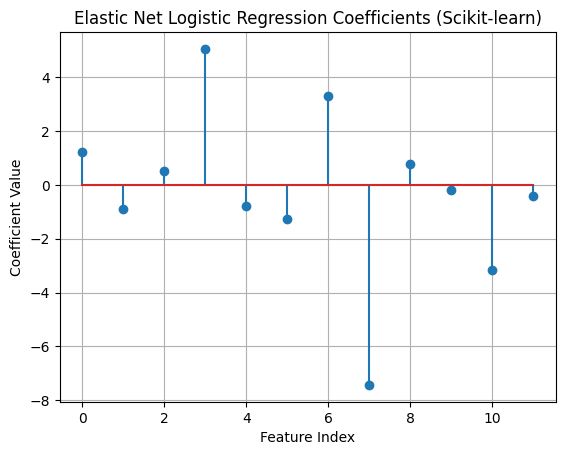

In [51]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="elasticnet",
    solver="saga",
    l1_ratios=[0.5],
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("Elastic Net Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### Scikit-learn alpha = 0

Best lambda: 0.013257113655901109
Probabilities: [8.61664831e-03 4.43685162e-05 6.13104489e-05 3.56018358e-02
 3.04062308e-03]
Test accuracy: 0.9969207082371054


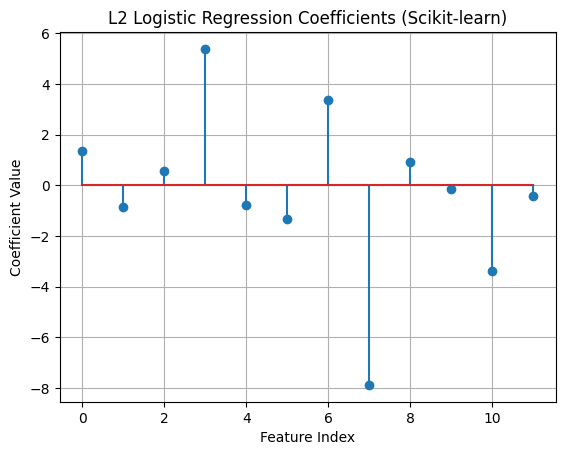

In [52]:
sk_model = LogisticRegressionCV(
    Cs=50,
    penalty="l2",
    solver="liblinear",
    scoring="accuracy",
    cv=5,
    max_iter=1000,
    refit=True,
)

sk_model.fit(X_train, Y_train)

C_best = sk_model.C_[0]
lambda_best = 1 / C_best
print("Best lambda:", lambda_best)

probs = sk_model.predict_proba(X_test)[:, 1]
print("Probabilities:", probs[:5])

accuracy = sk_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)

plt.figure()
plt.stem(sk_model.coef_[0])
plt.title("L2 Logistic Regression Coefficients (Scikit-learn)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()